# Detection on Low Resolution images

We have considered two pre processing techniques.
**One**: We have just upscaled the images and predicted on them.
**Two**: We have used a filter called EDSRx2 - Enhanced Deep Super Resolution Network and upscaled the images.

Both have them showed better predictions than predictions on the original low resolution image. Further, filter upscale showed better results.



In [ ]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 274 kB 5.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=639450504b8cfeb43dea2cdfa3cc33a1f49c696806f11ce2bfb58f1dc409ffb8
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 824 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Succe

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 849 kB/s 
     |████████████████████████████████| 74 kB 2.4 MB/s 
     |████████████████████████████████| 145 kB 15.8 MB/s 
     |████████████████████████████████| 130 kB 49.0 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 749 kB 34.0 MB/s 
     |████████████████████████████████| 843 kB 43.6 MB/s 
     |████████████████████████████████| 112 kB 47.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=756cc0fb6bfa5f44f83da0ed0cad16cb97a764e8e7b3322c058899fca61f4d8c
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=fa02a71da97f1556a8eae380e9448a831d8902f726bb20e2f711b03d81ee10

In [ ]:
import cv2

In [ ]:
!pip install opencv-contrib-python

In [ ]:
!pip install --upgrade opencv-python
!pip install --upgrade opencv-contrib-python

     |████████████████████████████████| 60.3 MB 1.4 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 66.5 MB 131 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2
import os
import numpy as np
import json
import random
import matplotlib.pyplot as plt
%matplotlib inline

from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

In [ ]:
import cv2
from cv2 import dnn_superres

In [ ]:
sr = dnn_superres.DnnSuperResImpl_create()

In [ ]:
image = cv2.imread('/content/drive/MyDrive/test/170_100.jpg')
path = "/content/drive/MyDrive/Coders++/EDSR_x2.pb"
# reading the filter
sr.readModel(path)
# applying the filter
sr.setModel("edsr", 4)
result = sr.upsample(image)
cv2.imwrite("/content/drive/MyDrive/test/340_200_upscaled_.jpg", result)

True

In [ ]:
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode, Visualizer

# config file for prediction
cfg = get_cfg()
# merge both the previous config file from training and the current one

cfg.merge_from_file("/content/drive/MyDrive/Coders++/new_model/output.yaml")

# add the model weights created from training
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Coders++/new_model/model_final.pth")

# threshold for detecting objects
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# creation of predictor object based on new config file with retrained neural network and configurations
predictor = DefaultPredictor(cfg)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# list of classes considered
classes = ['car', 'autorickshaw', 'motorbike', 'building', 'bridge', 'truck', 'person', 'bus', 'traffic light', 'traffic sign']
classes.sort()
print(classes)

['autorickshaw', 'bridge', 'building', 'bus', 'car', 'motorbike', 'person', 'traffic light', 'traffic sign', 'truck']


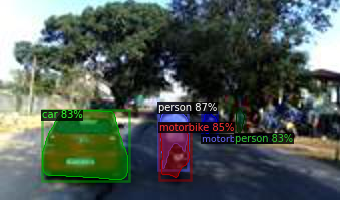

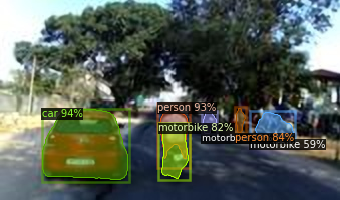

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

pathh = "/content/drive/MyDrive/test/"
# cv2_imshow(img_)

#test with an image
test = ['340_200_.jpg', '340_200_upscaled_.jpg']
for i in test:
  img = cv2.imread(pathh+i)
  img.shape

  # predicting an image: return object will be of certain format associated with detectron2
  outputs = predictor(img)

  # Note: outputs come in BGR format. It is the reason we are using cv2 for reading the image as cv2 stays with BGR format.

  # creating visualizer object: parameters: Image - (entire row, entire column and 3rd dimension in reverse order - BGR to RGB)
  #                                         Metadata - entire classes
  #                                         Scale - Scaling for the image
  #                                         Instance_mode - Colors associated with the image                                            
  m_data = MetadataCatalog.get("category_train").set(thing_classes = classes)
  v = Visualizer(img[:, :, ::-1],
                metadata = m_data, 
                scale = 1, 
                instance_mode = ColorMode.SEGMENTATION # removes the colors of unsegmented pixels
    )

  # Drawing the prediction instances on the image based on the outputs generated
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  # Note: Certainly, process will use GPU - CUDA for prediction also. To leave the work on GPU, we can use CPU for prediction using .to('cpu)

  # again converting RGB to BGR as cv2 supports BGR formats
  img = v.get_image()[:, :, ::-1]
  # we are using cv2_imshow from google colab patches as original cv2.imshow won't in both jupyter notebook and google colab (.ipynb)
  cv2_imshow(img)